## Recurrent Neurons and Layers

### Memory Cells

### Input and Output Sequences

## Training RNNs

## Forecasting a Time Series

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [81]:
## basic setting for tensorflow
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))
tf.debugging.set_log_device_placement(False)
# set GPU memory growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [65]:
def generate_time_series(batch_size, n_steps):
    freq1, freq2, offset1, offset2 = np.random.rand(4, batch_size, 1)
    time = np.linspace(0, 1, n_steps)
    series = 0.5 * np.sin((time-offset1) * (freq1*10+10))
    series += 0.2 * np.sin((time-offset2) * (freq2*20+20))
    series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5)
    return series[..., np.newaxis].astype(np.float32)

In [117]:
n_steps = 50
series = generate_time_series(10000, n_steps+1)
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]

### Baseline Metrics

In [67]:
## Predict the last value in each series
y_pred = X_valid[:, -1]
np.mean(keras.losses.mean_squared_error(y_valid, y_pred))

0.020378634

In [68]:
## Use a fully connected netword.
model = keras.Sequential([
    keras.layers.Flatten(input_shape=[50, 1]),
    keras.layers.Dense(1)
])

In [69]:
model.compile(loss=keras.losses.mean_squared_error, optimizer=keras.optimizers.Adam())

In [70]:
history = model.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_valid, y_valid), verbose=0)

### Implement a Simple RNN

In [73]:
model = keras.Sequential([
    keras.layers.SimpleRNN(1, input_shape=[None, 1])
])

In [74]:
model.compile(loss=keras.losses.mean_squared_error, optimizer=keras.optimizers.Adam())

In [75]:
history = model.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_valid, y_valid), verbose=0)

### Deep RNNs

In [109]:
model = keras.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20, return_sequences=True),
    keras.layers.SimpleRNN(1)
])

In [ ]:
model.compile(loss=keras.losses.mean_squared_error, optimizer=keras.optimizers.Adam())
history = model.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_valid, y_valid), verbose=0)

In [120]:
model = keras.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20, return_sequences=True),
    keras.layers.Dense(1)
])
model.compile(loss=keras.losses.mean_squared_error, optimizer=keras.optimizers.Adam())
history = model.fit(X_train, y_train, batch_size=32, epochs=1, validation_data=(X_valid, y_valid), verbose=1)

219/219 [==============================] - 5s 25ms/step - loss: 0.1466 - val_loss: 0.1436


In [119]:
# return_sequences=True, we can apply TimeDistributed() on that layer
model = keras.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(1))
])
model.compile(loss=keras.losses.mean_squared_error, optimizer=keras.optimizers.Adam())
history = model.fit(X_train, y_train, batch_size=32, epochs=1, validation_data=(X_valid, y_valid), verbose=1)

219/219 [==============================] - 5s 25ms/step - loss: 0.1432 - val_loss: 0.1317


In [116]:
model.summary() #return_sequences=True
# Dense layer operate on the last dim, so without TimeDistributed(), it's runable

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_18 (SimpleRNN)    (None, None, 20)          440       
_________________________________________________________________
simple_rnn_19 (SimpleRNN)    (None, None, 20)          820       
_________________________________________________________________
time_distributed (TimeDistri (None, None, 1)           21        
Total params: 1,281
Trainable params: 1,281
Non-trainable params: 0
_________________________________________________________________


In [112]:
model.summary() #return_sequences=True

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_14 (SimpleRNN)    (None, None, 20)          440       
_________________________________________________________________
simple_rnn_15 (SimpleRNN)    (None, None, 20)          820       
_________________________________________________________________
dense_6 (Dense)              (None, None, 1)           21        
Total params: 1,281
Trainable params: 1,281
Non-trainable params: 0
_________________________________________________________________


In [114]:
model.summary() #return_sequences=Frue

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_16 (SimpleRNN)    (None, None, 20)          440       
_________________________________________________________________
simple_rnn_17 (SimpleRNN)    (None, 20)                820       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 21        
Total params: 1,281
Trainable params: 1,281
Non-trainable params: 0
_________________________________________________________________


### Forecasting Several Time Steps Ahead

In [121]:
series = generate_time_series(10000, n_steps+10)
X_train, y_train = series[:7000, :n_steps], series[:7000, n_steps:, 0]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, n_steps:, 0]
X_test, y_test = series[9000:, :n_steps], series[9000:, n_steps:, 0]

In [ ]:
## Sequence to vector
model = keras.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20),
    keras.layers.Dense(10)
])
model.compile(loss=keras.losses.mean_squared_error, optimizer=keras.optimizers.Adam())
history = model.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_valid, y_valid), verbose=1)

In [131]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_26 (SimpleRNN)    (None, None, 20)          440       
_________________________________________________________________
simple_rnn_27 (SimpleRNN)    (None, 20)                820       
_________________________________________________________________
dense_12 (Dense)             (None, 10)                210       
Total params: 1,470
Trainable params: 1,470
Non-trainable params: 0
_________________________________________________________________


In [132]:
## Sequence to Sequence
Y = np.empty((10000, n_steps, 10))
for step_ahead in range(1, 10+1):
    Y[:, :, step_ahead-1] = series[:, step_ahead:step_ahead+n_steps, 0]
Y_train = Y[:7000]
Y_valid = Y[7000:9000]
y_test = Y[9000:]

In [ ]:
model = keras.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])
# only the last time output is useful for predictions and for evaluation
def last_time_step_mse(Y_true, Y_pred):
    return keras.metrics.mean_squared_error(Y_true[:, -1], Y_pred[:, -1])

model.compile(loss=keras.losses.mean_squared_error, optimizer=keras.optimizers.Adam(learning_rate=0.01), metrics=[last_time_step_mse])
history = model.fit(X_train, Y_train, batch_size=32, epochs=20, validation_data=(X_valid, Y_valid), verbose=1)

## Handling Long Sequences

### Fighting the Unstable Gradients Problem

In [221]:
## Layer Normalization with RNN cell
class LNSimpleRNNCell(keras.layers.Layer):
    def __init__(self, units, activation='tanh', **kwargs):
        super().__init__(**kwargs)
        self.state_size = units
        self.output_size = units
        self.simple_rnn_cell = keras.layers.SimpleRNNCell(units, activation=None)
        self.layer_norm = keras.layers.LayerNormalization()
        self.activation = keras.activations.get(activation)
    def call(self, inputs, states):
        outputs, new_states = self.simple_rnn_cell(inputs, states)
        norm_outputs = self.activation(self.layer_norm(outputs))
        return norm_outputs, new_states

In [222]:
model = keras.Sequential([
    keras.layers.RNN(LNSimpleRNNCell(20), return_sequences=True, input_shape=[None, 1]),
    keras.layers.RNN(LNSimpleRNNCell(20), return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

In [ ]:
model.compile(loss=keras.losses.mean_squared_error, optimizer=keras.optimizers.Adam(learning_rate=0.01), metrics=[last_time_step_mse])
history = model.fit(X_train, Y_train, batch_size=32, epochs=20, validation_data=(X_valid, Y_valid), verbose=1)

### Tackling the Short-Term Memory Problem

__LSTM cells__

In [ ]:
model = keras.Sequential([
    keras.layers.LSTM(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.LSTM(20, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])
model.compile(loss=keras.losses.mean_squared_error, optimizer=keras.optimizers.Adam(learning_rate=0.01), metrics=[last_time_step_mse])
history = model.fit(X_train, Y_train, batch_size=32, epochs=20, validation_data=(X_valid, Y_valid), verbose=1)

In [ ]:
## same functionality
## NOTE: LSTM has GPU-accelarated, while RNN(LSTMCell DO NOT)
model = keras.Sequential([
    keras.layers.RNN(keras.layers.LSTMCell(20), return_sequences=True, input_shape=[None, 1]),
    keras.layers.RNN(keras.layers.LSTMCell(20), return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])
model.compile(loss=keras.losses.mean_squared_error, optimizer=keras.optimizers.Adam(learning_rate=0.01), metrics=[last_time_step_mse])
history = model.fit(X_train, Y_train, batch_size=32, epochs=20, validation_data=(X_valid, Y_valid), verbose=1)

![](https://cdn.mathpix.com/snip/images/RcGda2LZdElVI96HKvgYLceqi35_O2x9HZpW5ZSrxpQ.original.fullsize.png)

__Peephole connections__  
Let the controllers get the information from cell states:  
- previous long-term state($c_{t-1}$) is added as an input to the fogget gate and input gate.
- current long-term state($c_{t}$) is added as an input to the ouptut gate

In [233]:
## Use keras.layers.RNN(tf.keras.experimental.PeepholeLSTMCell())

__GRU cells__

![](https://cdn.mathpix.com/snip/images/PA3wg9d07UarXGegS__7GXXHEgnu543AKYI_XuVR-8w.original.fullsize.png)

__Using 1D convolutional layers to process sequences__

In [ ]:
model = keras.Sequential([
    keras.layers.Conv1D(filters=20, kernel_size=4, strides=2, padding='VALID', input_shape=[None, 1]),
    keras.layers.GRU(20, return_sequences=True),
    keras.layers.GRU(20, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])
model.compile(loss=keras.losses.mean_squared_error, optimizer='adam', metrics=[last_time_step_mse])
history = model.fit(X_train, Y_train[:, 3::2], epochs=20, validation_data=(X_valid, Y_valid[:, 3::2]))

__WaveNet__

In [ ]:
model = keras.Sequential()
model.add(keras.layers.InputLayer(input_shape=[None, 1]))
for rate in (1, 2, 4, 8)*2:
    model.add(keras.layers.Conv1D(filters=20, kernel_size=2, padding='causal', \
                                  activation='relu', dilation_rate=rate))
model.add(keras.layers.Conv1D(filters=10, kernel_size=1))
model.compile(loss='mse', optimizer='adam', metrics=[last_time_step_mse])
history = model.fit(X_train, Y_train, epochs=20, validation_data=(X_valid, Y_valid))

Padding = "causal"  

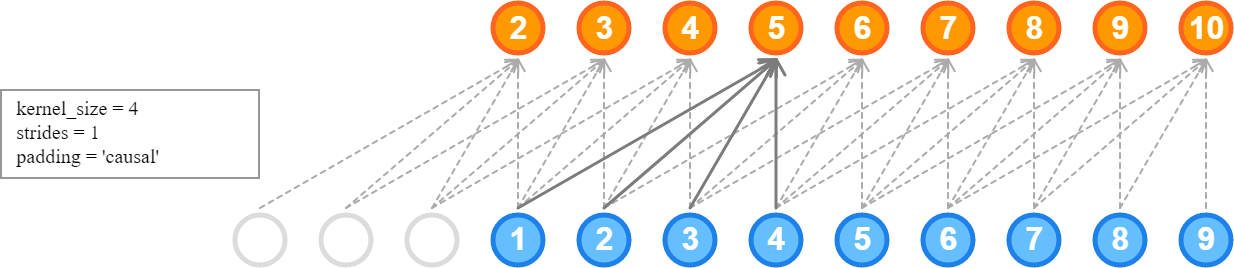

Dilation just means skipping nodes. Unlike strides which tells you where to apply the kernel next, dilation tells you how to spread your kernel. In a sense, it is equivalent to a stride in the previous layer.

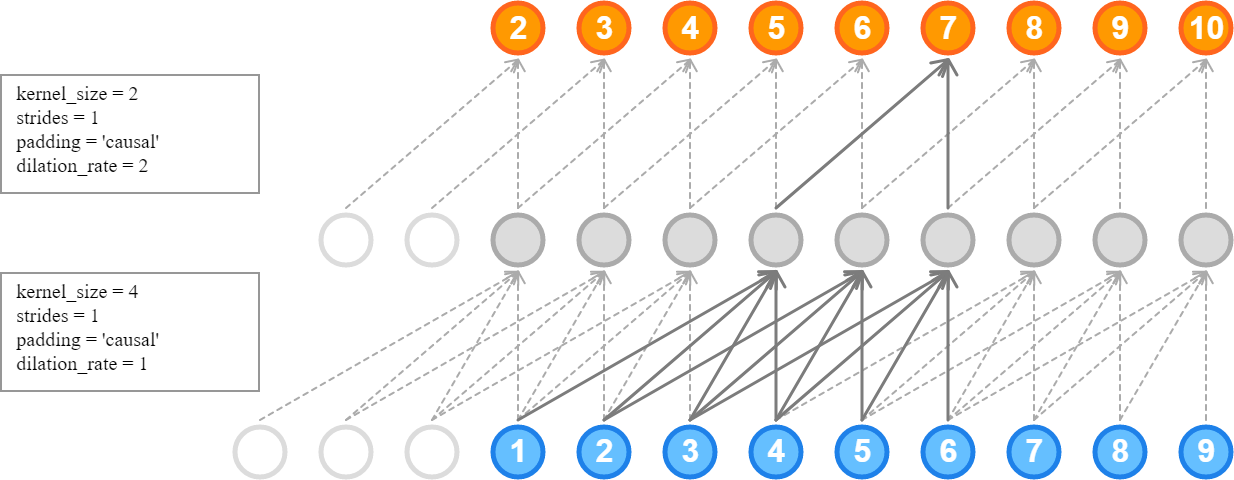

$$
\text{number of padding} = dilation\_date * (kernel\_size-1)
$$

![](https://i.stack.imgur.com/m6gDp.gif)